# Project – Week 7

## Task

In [1]:
print('Basic Python visualization of like/dislike ratio on y axis, view count on x axis, to start drawing some conclusions.')

Basic Python visualization of like/dislike ratio on y axis, view count on x axis, to start drawing some conclusions.


## Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from datetime import datetime as dt

In [3]:
original = pd.read_csv('master_data.csv')

/Users/azzamturkistani/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,12,13,14,15,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = original.copy()

In [5]:
df.head(1)

,Unnamed: 0,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,...,description,comments,publishedAt,channelId,channelTitle,categoryId,trending_date,thumbnail_link,comments_disabled,ratings_disabled
0,0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

Unnamed: 0             int64
video_id              object
title                 object
channel_id            object
channel_title         object
published_at          object
view_count             int64
likes                  int64
dislikes               int64
comment_count          int64
tags                  object
description           object
comments              object
publishedAt           object
channelId             object
channelTitle          object
categoryId           float64
trending_date         object
thumbnail_link        object
comments_disabled     object
ratings_disabled      object
dtype: object

In [7]:
df.memory_usage().sum()/(10**9)

0.173494568

In [8]:
for i in [1,2,3,4, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20]:
    col = df.columns[i]
    df[col] = df[col].astype('category')

df[df.columns[5]] = pd.to_datetime(df[df.columns[5]])
df.dtypes

Unnamed: 0                    int64
video_id                   category
title                      category
channel_id                 category
channel_title              category
published_at         datetime64[ns]
view_count                    int64
likes                         int64
dislikes                      int64
comment_count                 int64
tags                       category
description                category
comments                   category
publishedAt                category
channelId                  category
channelTitle               category
categoryId                  float64
trending_date              category
thumbnail_link             category
comments_disabled          category
ratings_disabled           category
dtype: object

In [9]:
df.memory_usage().sum()/(10**9)

0.156207824

## Visualize

In [10]:
dfc = df.copy()

### Dislikes / Likes

In [11]:
dfc = df.copy()

In [12]:
dfc = dfc[['likes', 'dislikes']]
dfc = dfc.dropna()
dfc = dfc.sort_values(by = 'likes')

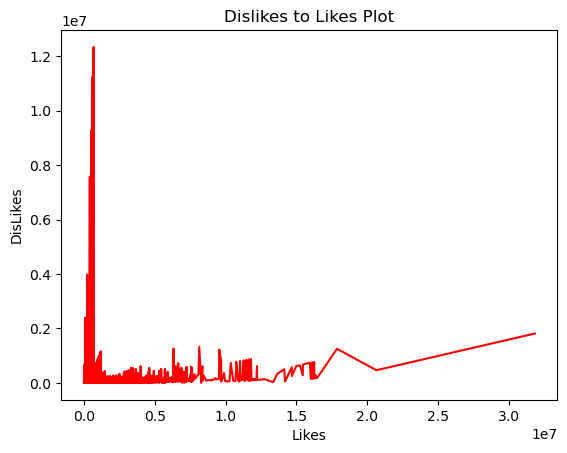

In [13]:
plt.title('Dislikes to Likes Plot')
plt.xlabel('Likes')
plt.ylabel('DisLikes')
plt.plot(dfc['likes'], dfc['dislikes'], color = 'red')
plt.show()
# plt.savefig('Dislikes-Likes')

In [14]:
# dfc.to_csv('1. Dislikes Relation to Likes.csv', index = False, header = True)

### Dislikes/Likes Ratio (Y) View Count (X)

In [15]:
dfc = df.copy()

In [16]:
dfc = dfc[['view_count', 'likes', 'dislikes']]
dfc = dfc.dropna()
dfc['dislikes/likes'] = dfc['dislikes']/dfc['likes']
dfc = dfc[['view_count', 'dislikes/likes']]
dfc = dfc.sort_values(by = 'view_count')

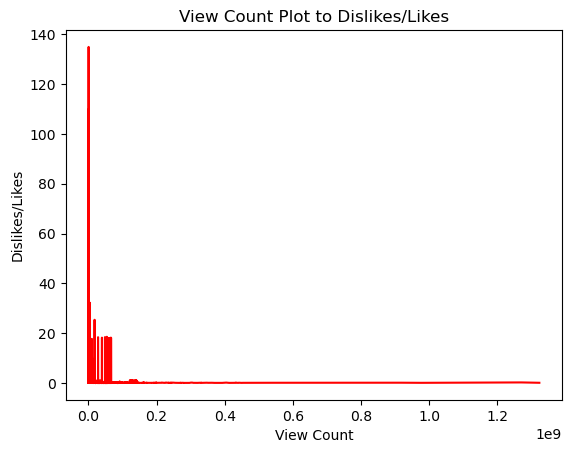

In [17]:
plt.title('View Count Plot to Dislikes/Likes')
plt.xlabel('View Count')
plt.ylabel('Dislikes/Likes')
plt.plot(dfc['view_count'], dfc['dislikes/likes'], color = 'red')
plt.show()
# plt.savefig('Dislikes-Likes Ratio (Y) View Count (X).png')

In [18]:
# dfc.to_csv('2. View Count Relation to Dislikes Over Likes Ratio.csv', index = False, header = True)

### Dislikes/Likes Ratio Over Time

In [19]:
dfc = df.copy()

In [20]:
dfc = dfc[['published_at', 'likes', 'dislikes']]
dfc['dislikes/likes'] = dfc['dislikes']/dfc['likes']
dfc = dfc[['published_at', 'dislikes/likes']]
dfc = dfc.dropna()
dfc['published_at'] = pd.to_datetime(dfc['published_at'], errors = 'coerce')
dfc = dfc.dropna(subset = ['published_at'])
dfc = dfc.sort_values(by = 'published_at')

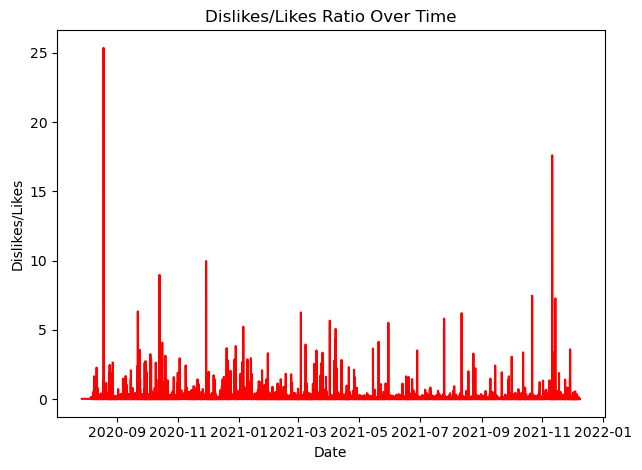

In [21]:
plt.title('Dislikes/Likes Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Dislikes/Likes')
plt.tight_layout()
plt.plot(dfc['published_at'], dfc['dislikes/likes'], color = 'red')
plt.show()
#plt.savefig('Dislikes-Likes Ratio Over Time.png')

In [22]:
# dfc.to_csv('3. Dislikes To Likes Ratio Relation to Publishing Date.csv', index = False, header = True)

### Dislikes/Likes Average Over Months

In [23]:
dfc = df.copy()

In [24]:
dfc = dfc[['published_at', 'likes', 'dislikes']]
dfc['dislikes/likes'] = dfc['dislikes']/dfc['likes']
dfc = dfc[['published_at', 'dislikes/likes']]

dfc['published_at'] = pd.to_datetime(dfc['published_at'], errors = 'coerce')
dfc = dfc.dropna(subset = ['published_at'])

#dfc['published_at'] = dfc['published_at'].map(pd.Timestamp.fromordinal)
dfc['published_at'] = pd.to_datetime(dfc['published_at'], errors = 'coerce').dt.to_period('m')
dfc = dfc.dropna()
# dfc['published_at'] = [x.year for x in dfc['published_at']]

dfc = dfc.groupby('published_at').mean()
dfc.index = dfc.index.strftime('%Y-%m')
dfc = dfc.reset_index()

dfc = dfc.sort_values(by = 'published_at')

In [25]:
# pd.plotting.register_matplotlib_converters()
# pd.plotting.deregister_matplotlib_converters()

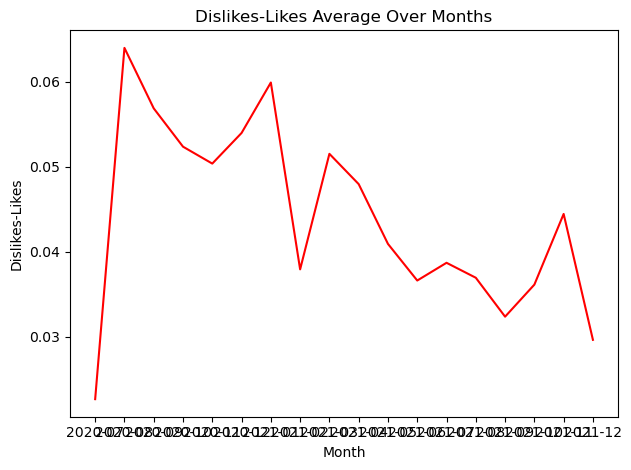

In [26]:
plt.title('Dislikes-Likes Average Over Months')
plt.xlabel('Month')
plt.ylabel('Dislikes-Likes')
plt.tight_layout()
plt.plot(dfc['published_at'], dfc['dislikes/likes'], color = 'red')
plt.show()
# plt.savefig('Dislikes-Likes Average Over Months.png')

In [27]:
# dfc.to_csv('4. Dislikes To Likes Ratio Relation to Publishing Months.csv', index = False, header = True)

### Publishing Day or Month to View Count Relation

In [28]:
dfc = df.copy()

In [29]:
dfc = dfc[['published_at', 'view_count']]
dfc = dfc.dropna()
dfc['published_at'] = pd.to_datetime(dfc['published_at']).dt.to_period('d')
dfc = dfc.groupby('published_at').mean()
dfc.index = dfc.index.strftime('%Y-%m-%d')
dfc = dfc.reset_index()
dfc = dfc.sort_values(by = 'published_at')

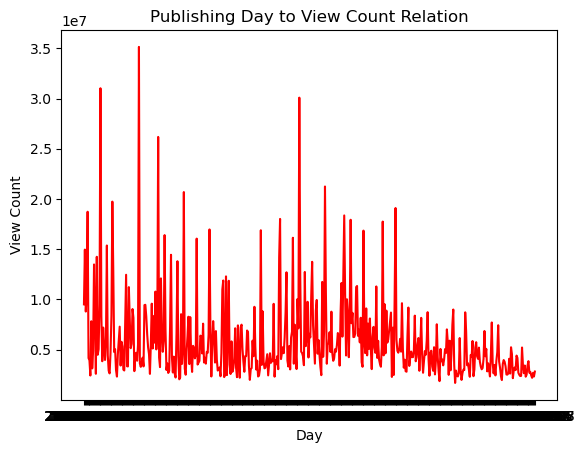

In [30]:
plt.title('Publishing Day to View Count Relation')
plt.xlabel('Day')
plt.ylabel('View Count')
plt.plot(dfc['published_at'], dfc['view_count'], color = 'red')
plt.show()
# plt.savefig('Publishing Day to View Count Relation.png')

In [31]:
# dfc.to_csv('5. View Count Relation to Publishing Day.csv', index = False, header = True)

In [32]:
dfc = df.copy()

In [33]:
dfc = dfc[['published_at', 'view_count']]
dfc = dfc.dropna()
dfc['published_at'] = pd.to_datetime(dfc['published_at']).dt.to_period('m')
dfc = dfc.groupby('published_at').mean()
dfc.index = dfc.index.strftime('%Y-%m')
dfc = dfc.reset_index()
dfc = dfc.sort_values(by = 'published_at')

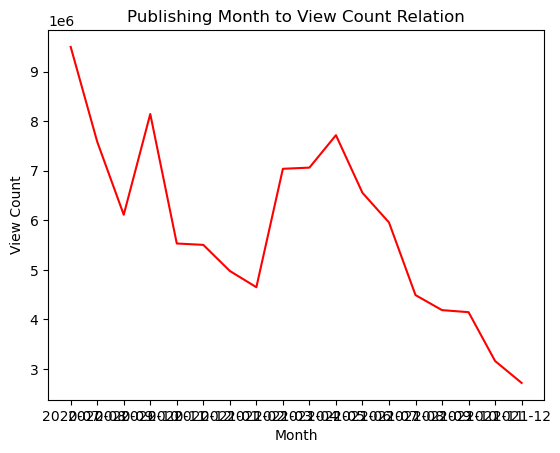

In [34]:
plt.title('Publishing Month to View Count Relation')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.plot(dfc['published_at'], dfc['view_count'], color = 'red')
plt.show()
# plt.savefig('Publishing Month to View Count Relation.png')

In [35]:
# dfc.to_csv('6. View Count Relation to Publishing Month.csv', index = False, header = True)

### View Count to Comments Enabling Relation

In [36]:
dfc = df.copy()

In [37]:
dfc = dfc[['view_count', 'comments_disabled']]
dfc = dfc.dropna()
#dfc = dfc[dfc['comments_disabled'] == True]
dfc = dfc.groupby('comments_disabled').mean()
dfc = dfc.rename(columns = {'view_count' : 'view_count_mean'})

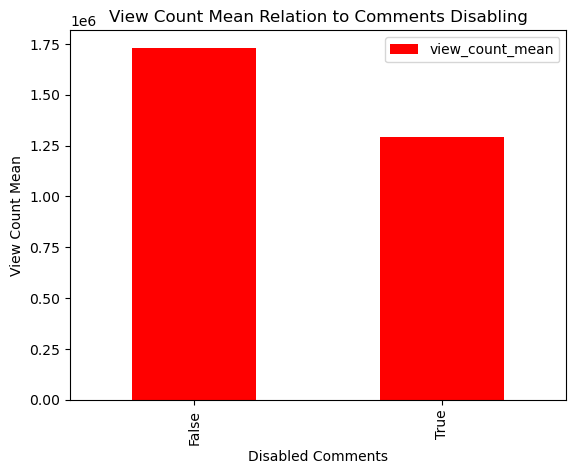

In [38]:
dfc.plot.bar(title = 'View Count Mean Relation to Comments Disabling', xlabel = 'Disabled Comments', ylabel = 'View Count Mean', color = 'red')
plt.show()
# plt.savefig('View Count Mean Relation to Comments Disabling.png')

In [39]:
# dfc.to_csv('7. View Count Mean Relation to Disabling Comments.csv', index = False, header = True)

In [40]:
dfc = df.copy()

In [41]:
dfc = dfc[['view_count', 'comments_disabled']]
dfc = dfc.dropna()
dfc = dfc.groupby('comments_disabled').max()
dfc = dfc.rename(columns = {'view_count' : 'view_count_max'})

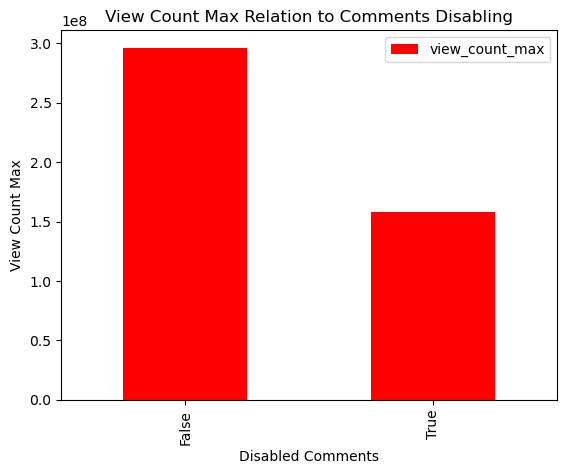

In [42]:
dfc.plot.bar(title = 'View Count Max Relation to Comments Disabling', xlabel = 'Disabled Comments', ylabel = 'View Count Max', color = 'red')
plt.show()
# plt.savefig('View Count Max Relation to Comments Disabling.png')

In [43]:
# dfc.to_csv('8. View Count Max Relation to Disabling Comments.csv', index = False, header = True)

In [44]:
dfc = df.copy()

In [45]:
dfc = dfc[['view_count', 'comments_disabled']]
dfc = dfc.dropna()
dfc = dfc[dfc['view_count'] > 0].groupby('comments_disabled').min()
dfc = dfc.rename(columns = {'view_count' : 'view_count_min'})

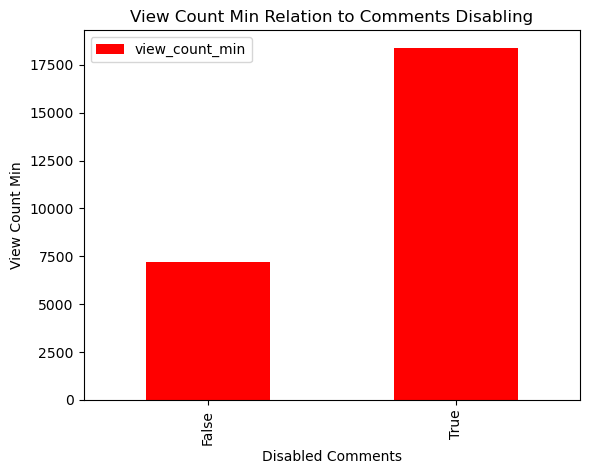

In [46]:
dfc.plot.bar(title = 'View Count Min Relation to Comments Disabling', xlabel = 'Disabled Comments', ylabel = 'View Count Min', color = 'red')
plt.show()
# plt.savefig('View Count Min Relation to Comments Disabling.png')

In [47]:
# dfc.to_csv('9. View Count Min Relation to Disabling Comments.csv', index = False, header = True)

### END.